<a href="https://colab.research.google.com/github/karthikvarkala/Mushroom/blob/main/mushroom_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd 
# data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mushroom-classification/mushrooms.csv


# Dataset description

**About this file**

Attribute Information: (classes: edible=e, poisonous=p)

cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

bruises: bruises=t,no=f

odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

gill-attachment: attached=a,descending=d,free=f,notched=n

gill-spacing: close=c,crowded=w,distant=d

gill-size: broad=b,narrow=n

gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

stalk-shape: enlarging=e,tapering=t

stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

veil-type: partial=p,universal=u

veil-color: brown=n,orange=o,white=w,yellow=y

ring-number: none=n,one=o,two=t

ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

In [ ]:
mushroom_data=pd.read_csv("/kaggle/input/mushroom-classification/mushrooms.csv")

In [ ]:
mushroom_data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


# Exploring Data


In [ ]:
mushroom_data.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [ ]:
mushroom_data.shape

(8124, 23)

here we have 8124 rows and 23 columns

In [ ]:
mushroom_data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

its seems that we dont have any missing values in any of the row


cardinality in each attribute


In [ ]:
for i in mushroom_data.columns:
  print(mushroom_data[i].value_counts(normalize=True)*100)
  print(mushroom_data[i].nunique())
  print("******************************")

e    51.797144
p    48.202856
Name: class, dtype: float64
2
******************************
x    45.002462
f    38.798621
k    10.192024
b     5.563762
s     0.393895
c     0.049237
Name: cap-shape, dtype: float64
6
******************************
y    39.931068
s    31.462334
f    28.557361
g     0.049237
Name: cap-surface, dtype: float64
4
******************************
n    28.114229
g    22.648941
e    18.463811
y    13.195470
w    12.801576
b     2.067947
p     1.772526
c     0.541605
u     0.196947
r     0.196947
Name: cap-color, dtype: float64
10
******************************
f    58.444116
t    41.555884
Name: bruises, dtype: float64
2
******************************
n    43.426883
f    26.587888
y     7.090103
s     7.090103
a     4.923683
l     4.923683
p     3.151157
c     2.363368
m     0.443131
Name: odor, dtype: float64
9
******************************
f    97.415066
a     2.584934
Name: gill-attachment, dtype: float64
2
******************************
c    83.85032
w    16.

1 by checking the cardinality of each attribite , there were the 30.5% of data with ?.

2 veil-type attribute is having only one value category.so it is not importent for us we drop that column


In [ ]:
mushroom_data.describe().T

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


In [ ]:
mushroom_data.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

By oberserving the data its seems to be all the data is in catogorical data ,so lets convert all the data columns into the catogorical type

In [ ]:
mushroom_data=mushroom_data.astype("category")

In [ ]:
mushroom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   class                     8124 non-null   category
 1   cap-shape                 8124 non-null   category
 2   cap-surface               8124 non-null   category
 3   cap-color                 8124 non-null   category
 4   bruises                   8124 non-null   category
 5   odor                      8124 non-null   category
 6   gill-attachment           8124 non-null   category
 7   gill-spacing              8124 non-null   category
 8   gill-size                 8124 non-null   category
 9   gill-color                8124 non-null   category
 10  stalk-shape               8124 non-null   category
 11  stalk-root                8124 non-null   category
 12  stalk-surface-above-ring  8124 non-null   category
 13  stalk-surface-below-ring  8124 non-null   catego

In [ ]:
mushroom_data.drop(columns ="veil-type",inplace=True,axis=1)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
mushroom_data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,s,w,w,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,s,w,w,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,s,w,w,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,s,w,w,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,s,w,w,w,o,e,n,a,g


In [ ]:
#Pie chart for spotting number of fraud and non fraud claims 
plt.figure(figsize=[10,10])
fig = px.pie(mushroom_data,names='class')
fig.show()

<Figure size 720x720 with 0 Axes>

By seeing the plot we can say that data is Balanced

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



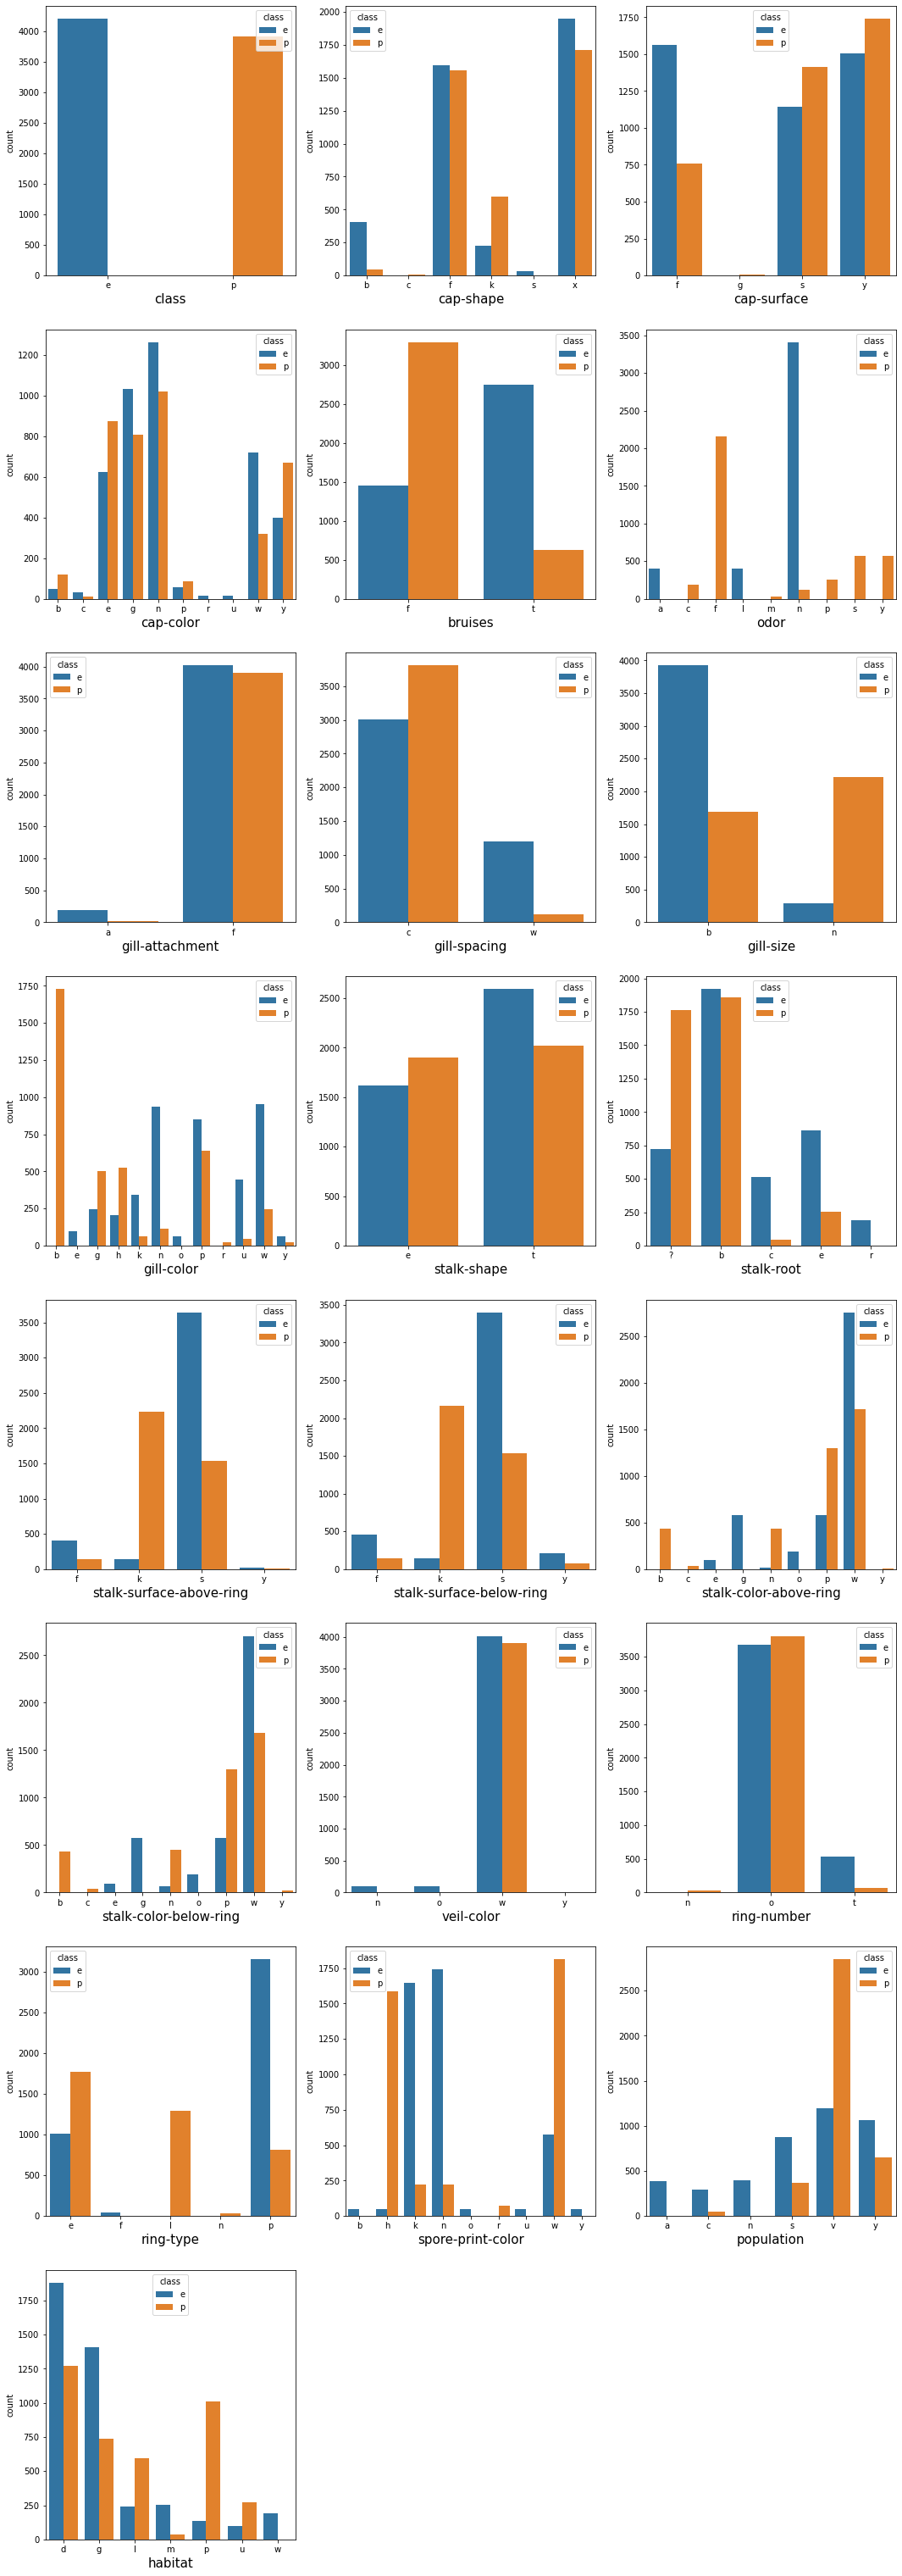

In [ ]:
plt.figure(figsize = (18, 55))
plotnumber=1
for col in mushroom_data.columns:
    plt.subplot(8,3,plotnumber)
    sns.countplot(mushroom_data[col],hue="class",data=mushroom_data)
    plt.xlabel(col,fontsize=15)
    plotnumber +=1
plt.show()

**By this we get to know that ,there are some things which are most likely to be edible and poisonous**

**Edible**

1 mushrooms with shape of bell=b 

2 mushrooms with cap-color of white=w
 
3 mushrooms with bruises of bruises=t

4 mushrooms with odor of none=n

5 mushrooms with gill-color of brown=n,purple=u,white=w

6 mushrooms with stalk-root of club=c ,equal=e

7 mushrooms with ring -type of pendant=p

8 mushrooms with spore-print-color black=k,brown=n


**poisonous**

1 mushrooms with shape of  knobbed=k

2 mushrooms with cap-color of yellow=y 

3 mushrooms with odor of creosote=c,fishy=y,foul=f,pungent=p,spicy=s 

4 mushrooms with gill-color of buff=b

5 mushrooms with stalk-surface-above-ring of silky=k
  
6 mushrooms with  stalk-surface-below-ring of silky=k
  
7 mushrooms with ring -type of large=l

8 mushrooms with spore-print-color chocolate=h,,white=w

9 mushrooms with habitat of paths=p 


# Preprosseing of data

In [ ]:
# seperarting independent and dependent variables
X=mushroom_data.drop(["class"],axis=1)
y=mushroom_data['class']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=123)

In [ ]:
from sklearn.preprocessing import LabelEncoder
Encoder_X = LabelEncoder()
for col in X.columns:
    X_train[col] = Encoder_X.fit_transform(X_train[col])
    X_test[col] = Encoder_X.fit_transform(X_test[col])
Encoder_y = LabelEncoder()
y_train = Encoder_y.fit_transform(y_train)
y_test = Encoder_y.fit_transform(y_test)

In [ ]:
X_train

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
5316,2,3,4,1,5,1,0,0,10,0,...,2,2,7,7,2,2,0,7,1,6
1073,5,0,3,1,5,1,0,0,7,1,...,2,2,6,7,2,1,4,2,5,0
7552,3,2,8,0,5,1,1,0,7,0,...,1,1,7,7,2,2,4,7,3,1
3372,5,0,3,0,2,1,0,0,7,0,...,1,1,4,4,2,1,2,1,5,0
1207,2,3,8,1,6,1,0,1,7,0,...,2,2,7,7,2,1,4,2,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4060,5,3,9,0,2,1,0,0,3,0,...,1,1,0,0,2,1,2,1,4,1
1346,2,3,4,1,6,1,0,1,4,0,...,2,2,7,7,2,1,4,3,4,1
3454,5,0,8,0,1,1,1,1,9,0,...,2,2,7,7,2,1,4,3,3,0
7533,5,2,4,0,5,1,0,0,10,0,...,3,3,4,4,2,2,4,7,5,4


In [ ]:
y_train

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Model Building

#### LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
logi=LogisticRegression()
logi.fit(X_train,y_train)
# train_pred=logi.predict(X_train)
test_pred=logi.predict(X_test)

In [ ]:
print('classification_report of logisticRegression\n\n  ',classification_report(y_test,test_pred))

classification_report of logisticRegression

                 precision    recall  f1-score   support

           0       0.95      0.96      0.95      1271
           1       0.95      0.95      0.95      1167

    accuracy                           0.95      2438
   macro avg       0.95      0.95      0.95      2438
weighted avg       0.95      0.95      0.95      2438



In [ ]:
cm = confusion_matrix(y_test, test_pred)
print('confusion matrix of LogisticRegression \n',cm)

confusion matrix of LogisticRegression 
 [[1214   57]
 [  64 1103]]


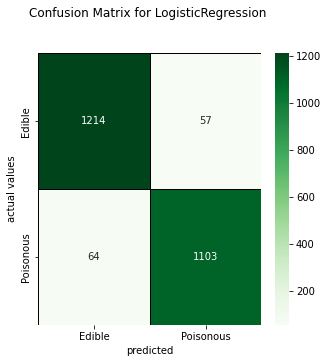

In [ ]:
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]

f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm, annot = True ,cmap="Greens",fmt = ".0f",linewidths=0.9,linecolor="black", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("predicted")
plt.ylabel("actual values")
plt.title('Confusion Matrix for LogisticRegression \n\n')
plt.show()


#### PCA 

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

### DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
test_pred=dt.predict(X_test)

In [ ]:
print("Decision Tree Classifier report: \n\n", classification_report(y_test, test_pred))


Decision Tree Classifier report: 

               precision    recall  f1-score   support

           0       0.93      0.93      0.93      1271
           1       0.93      0.92      0.92      1167

    accuracy                           0.93      2438
   macro avg       0.93      0.93      0.93      2438
weighted avg       0.93      0.93      0.93      2438



In [ ]:
cm = confusion_matrix(y_test, test_pred)
print('confusion matrix of DecisionTreeClassifier \n',cm)

confusion matrix of DecisionTreeClassifier 
 [[1186   85]
 [  93 1074]]


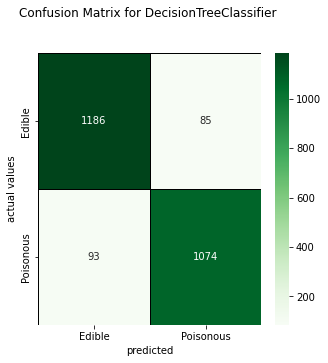

In [ ]:
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]

f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm, annot = True ,cmap="Greens",fmt = ".0f",linewidths=0.9,linecolor="black", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("predicted")
plt.ylabel("actual values")
plt.title('Confusion Matrix for DecisionTreeClassifier \n\n')
plt.show()

### predictions

In [ ]:
preds = dt.predict(X_test)
print(preds[:30])
print(y_test[:30])
# 0 - Edible
# 1 - Poisonous

[1 0 0 1 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 1 1 0]
[0 0 0 1 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 1 1 0]


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=500, random_state=42)
rf.fit(X_train, y_train)
test_pred = rf.predict(X_test)
print("RandomForestClassifier report: \n\n", classification_report(y_test, test_pred))

RandomForestClassifier report: 

               precision    recall  f1-score   support

           0       0.93      0.97      0.95      1271
           1       0.96      0.92      0.94      1167

    accuracy                           0.94      2438
   macro avg       0.94      0.94      0.94      2438
weighted avg       0.94      0.94      0.94      2438



In [ ]:
cm = confusion_matrix(y_test, test_pred)
print('confusion matrix of RandomForestClassifier \n',cm)

confusion matrix of RandomForestClassifier 
 [[1229   42]
 [  96 1071]]


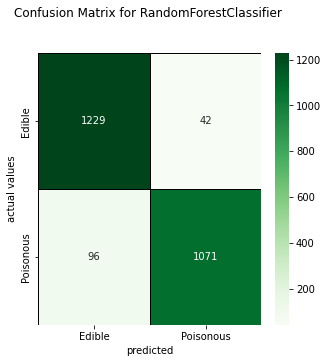

In [ ]:
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]

f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm, annot = True ,cmap="Greens",fmt = ".0f",linewidths=0.9,linecolor="black", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("predicted")
plt.ylabel("actual values")
plt.title('Confusion Matrix for RandomForestClassifier \n\n')
plt.show()

### predictions

In [ ]:
preds = rf.predict(X_test)
print(preds[:30])
print(y_test[:30])

[1 0 0 1 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 1 1 0]
[0 0 0 1 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 1 1 0]


# Conclusion

#### From the confusion matrix, we saw that our train and test data is balanced.

#### Most of the classification methods hit maximum accuracy with this dataset.
 